In [24]:
%config InlineBackend.figure_formats = ['svg']
import pandas as pd
import seaborn as sns
from glob import glob
sns.set_theme(style="ticks", font="Linux Biolinum O", font_scale=1.2)

frames = [pd.read_csv(data) for data in glob('../faulty-lost_*.csv')]
data = pd.concat(frames, ignore_index=True)

def classify(r):
    if r['fragment_k'] == 1:
        return "Kademlia"
    else:
        return "Entropy$_{(" + str(int(r['fragment_n'])) + ", 32)}$"

data['Protocol'] = data.apply(classify, axis=1)

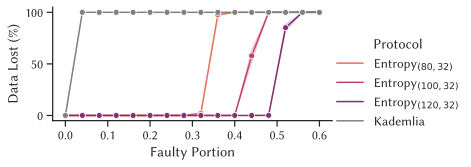

In [25]:
palette = sns.color_palette('flare', n_colors=3)
sns.relplot(data=data, 
    kind="line",
    x="faulty_rate", y="data_lost", hue="Protocol",
    hue_order=['Entropy$_{(80, 32)}$', 'Entropy$_{(100, 32)}$', 'Entropy$_{(120, 32)}$', 'Kademlia'],
    marker="o", palette=[*palette, 'gray'],
    height=2.56, aspect=2.) \
.set_xlabels("Faulty Portion") \
.set_ylabels("Data Lost (%)")